<a href="https://colab.research.google.com/github/ertgrulyksk/Data_Set_Story_and_Problem_Diabetes_Prediction/blob/main/Data_Set_Story_and_Problem__Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,mean_squared_error, r2_score,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.svm import SVC

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [12]:
loj_model.intercept_

array([-5.89182337])

In [13]:
loj_model.coef_

array([[ 1.17051909e-01,  2.83882398e-02, -1.68895484e-02,
         7.55589576e-04, -6.42808920e-04,  5.97634539e-02,
         6.77607988e-01,  7.24042917e-03]])

In [14]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [15]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [16]:
y_pred = loj_model.predict(X)

In [17]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

In [18]:
accuracy_score(y, y_pred)

0.7747395833333334

In [19]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [20]:
loj_model.predict_proba(X)[0:10]

array([[0.35040045, 0.64959955],
       [0.91702289, 0.08297711],
       [0.22474188, 0.77525812],
       [0.92139193, 0.07860807],
       [0.16723613, 0.83276387],
       [0.79899069, 0.20100931],
       [0.8801958 , 0.1198042 ],
       [0.27812825, 0.72187175],
       [0.32059435, 0.67940565],
       [0.92273397, 0.07726603]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [22]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train, y_train)

In [23]:
y_pred = loj_model.predict(X_test)

In [24]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [25]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102

In [26]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [28]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [29]:
knn_model

KNeighborsClassifier()

In [30]:
y_pred = knn_model.predict(X_test)

In [31]:
print(accuracy_score(y_test, y_pred))

0.6883116883116883


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [35]:
knn = KNeighborsClassifier()

In [36]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [37]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [39]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [40]:
knn_cv_model.best_score_

0.748637316561845

In [41]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [42]:
y_pred = knn_tuned.predict(X_test)

In [43]:
print(accuracy_score(y_test, y_pred))

0.7316017316017316


In [44]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [45]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [46]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [47]:
svm_model

SVC(kernel='linear')

In [48]:
y_pred = svm_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [50]:
svm_model = SVC()
svm_params = {"C": np.arange(1,10),
              "kernel": ["linear","rbf"]}
svm_cv_model = GridSearchCV(svm_model, svm_params, cv = 5).fit(X_train, y_train)

In [51]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [52]:
svm_cv_model.best_score_

0.7839044652128765

In [53]:
svm_tuned = SVC(kernel="linear",C=2).fit(X_train,y_train)

In [54]:
y_pred = svm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

In [55]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [56]:
mlp_model = MLPClassifier().fit(X_train,y_train)

In [57]:
mlp_model.coefs_

[array([[-7.65382357e-05, -1.53919106e-01, -1.55772720e-02,
         -1.40933479e-04,  5.18911697e-02, -7.59492934e-02,
         -1.58072647e-01, -1.28627423e-01,  5.26840162e-02,
          1.26549159e-01,  6.90128491e-06,  2.37567991e-01,
         -5.98482777e-02, -1.55971690e-02, -9.42234708e-04,
          3.45030104e-01,  2.22885998e-03, -5.83721325e-02,
         -1.65333220e-14, -1.25305042e-01,  2.09265780e-01,
          2.02831442e-01, -5.34693730e-02, -2.26834530e-01,
         -6.07126617e-02,  4.77195873e-01,  3.75013939e-02,
          4.94844273e-02, -1.01797507e-01,  6.67462521e-02,
         -5.45597201e-02,  2.15101122e-01, -5.94644651e-02,
          6.38863848e-02, -8.72181009e-02,  4.55584956e-01,
         -9.45562194e-02, -9.28183500e-02,  1.81528477e-02,
          9.36955749e-02, -1.21796876e-01, -2.16249012e-01,
         -1.56320413e-01, -6.49000550e-02, -2.89455913e-03,
          1.59047033e-01,  1.16444528e-02, -6.90726097e-02,
         -1.91434334e-01,  1.93205309e-0

In [58]:
mlp_model

MLPClassifier()

In [59]:
y_pred=mlp_model.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred)

0.7056277056277056

In [61]:
mlp_params = {"alpha": [5,0.1,0.01],
              "hidden_layer_sizes": [(100,100,100),(100,100)]}

In [64]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic")
mlp_cv_model = GridSearchCV(mlpc,mlp_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [65]:
mlp_cv_model.best_params_

{'alpha': 5, 'hidden_layer_sizes': (100, 100)}

In [67]:
mlp_tuned = MLPClassifier(solver = "lbfgs", activation = "logistic",
                          alpha = 5, hidden_layer_sizes = (100,100)).fit(X_train, y_train)

In [68]:
y_pred = mlp_tuned.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred)

0.7316017316017316

In [70]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [71]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [72]:
cart_model

DecisionTreeClassifier()

In [73]:
y_pred = cart_model.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred)

0.6796536796536796

In [75]:
cart_model = DecisionTreeClassifier()

In [76]:
cart_params = {"max_depth": [1,3,4,5,10],
               "min_samples_split": [2,10,5,30]}

In [77]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [78]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 30}

In [79]:
cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split = 30).fit(X_train, y_train)

In [80]:
y_pred = cart_tuned.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [82]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [83]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [84]:
rf_model

RandomForestClassifier()

In [85]:
y_pred = rf_model.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [87]:
rf = RandomForestClassifier()
rf_params = {"max_features": [2,5],
            "n_estimators":[200,500,1000],
            "min_samples_split":[2,10,80]}

In [88]:
rf_cv_model = GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [89]:
rf_cv_model.best_params_

{'max_features': 2, 'min_samples_split': 2, 'n_estimators': 1000}

In [90]:
rf_model = RandomForestClassifier(max_features=5,
                                min_samples_split=10,
                                n_estimators=200)
rf_tuned=rf_model.fit(X_train,y_train)

In [126]:
y_pred = rf_tuned.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred)

0.7445887445887446

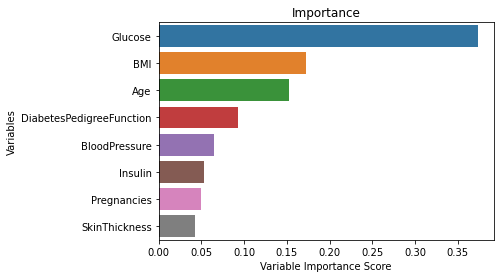

In [93]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [141]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [142]:
import xgboost
from xgboost import XGBClassifier

In [143]:
xgb = XGBClassifier().fit(X_train,y_train)
xgb

XGBClassifier()

In [144]:
y_pred = xgb.predict(X_test)

In [145]:
accuracy_score(y_test,y_pred)

0.7489177489177489

In [146]:
xgb = XGBClassifier()
xgb_params = {"learning_rate": [0.1,0.01] ,
             "max_depth":[4,5,8],
             "n_estimators":[100,500],
             "subsample":[0.5,1]}

In [147]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,
                            n_jobs =-1,verbose =2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [148]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [149]:
xgb_tuned = XGBClassifier(subsample=0.5,
                        learning_rate=0.01,
                        max_depth=4,
                        n_estimators=100).fit(X_train,y_train)

In [150]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

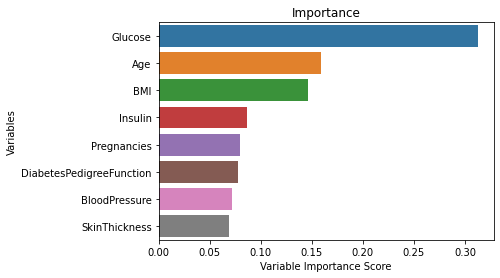

In [151]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [127]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [128]:
from lightgbm import LGBMClassifier

In [129]:
lgb_model = LGBMClassifier().fit(X_train,y_train)
lgb_model

LGBMClassifier()

In [130]:
y_pred = lgb_model.predict(X_test)

In [131]:
accuracy_score(y_test,y_pred)

0.7272727272727273

In [132]:
lgb = LGBMClassifier()

In [133]:
lgbm_params = {"learning_rate": [0.01,0.1,0.5,1],
              "n_estimators":[40,100,1000],
              "max_depth":[-1,1,2,3]}

In [134]:
lgbm_cv_model = GridSearchCV(lgb,lgbm_params,cv = 10,n_jobs =-1,
                            verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [135]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 40}

In [136]:
lgb_tuned = LGBMClassifier(learning_rate=0.1,
                         max_depth=1,
                         n_estimators=40).fit(X_train,y_train)

In [137]:
y_pred = lgb_tuned.predict(X_test)

In [138]:
accuracy_score(y_test,y_pred)

0.7575757575757576

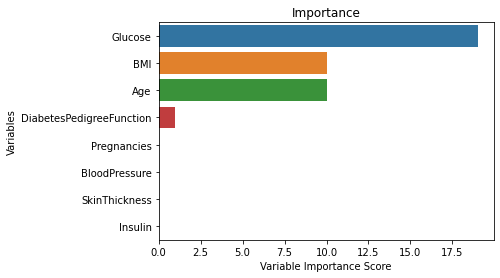

In [139]:
feature_imp = pd.Series(lgb_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [94]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [95]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
gbm_model

GradientBoostingClassifier()

In [97]:
y_pred = gbm_model.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [99]:
gbm_params = {"learning_rate":[0.1,0.01],
             "max_depth":[3,5],
             "n_estimators":[1000,500]}

In [100]:
gbm = GradientBoostingClassifier()

In [101]:
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv=10,
                            n_jobs=-1,verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [102]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [103]:
gbm_tuned = GradientBoostingClassifier(learning_rate =0.01,
                                     max_depth = 2,
                                     n_estimators=500).fit(X_train,y_train)

In [104]:
y_pred = gbm_tuned.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred)

0.7575757575757576

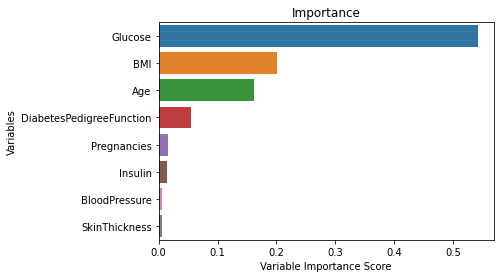

In [106]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [107]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1) # Outcome dışındakileri al
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.30,
                                                 random_state=42)

In [110]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [111]:
from catboost import CatBoostClassifier

In [112]:
catb_model = CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 47.5ms	remaining: 47.4s
1:	learn: 0.6843414	total: 48.6ms	remaining: 24.2s
2:	learn: 0.6805760	total: 49.7ms	remaining: 16.5s
3:	learn: 0.6765782	total: 56.9ms	remaining: 14.2s
4:	learn: 0.6720829	total: 58.2ms	remaining: 11.6s
5:	learn: 0.6681617	total: 59.4ms	remaining: 9.83s
6:	learn: 0.6641912	total: 60.5ms	remaining: 8.57s
7:	learn: 0.6602881	total: 61.6ms	remaining: 7.64s
8:	learn: 0.6562626	total: 62.7ms	remaining: 6.91s
9:	learn: 0.6528483	total: 67ms	remaining: 6.64s
10:	learn: 0.6487823	total: 70.3ms	remaining: 6.32s
11:	learn: 0.6454980	total: 71.4ms	remaining: 5.88s
12:	learn: 0.6418953	total: 72.6ms	remaining: 5.51s
13:	learn: 0.6374431	total: 74.1ms	remaining: 5.22s
14:	learn: 0.6339676	total: 75.3ms	remaining: 4.95s
15:	learn: 0.6304252	total: 77ms	remaining: 4.74s
16:	learn: 0.6266998	total: 78.2ms	remaining: 4.52s
17:	learn: 0.6237660	total: 79.8ms	remaining: 4.36s
18:	learn: 0.6204394	total: 81ms	remaining: 4.18s


In [113]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

In [114]:
catb = CatBoostClassifier()

In [115]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01,0.1],
              "depth":[3,6,8]}

In [116]:
catb_cv_model = GridSearchCV(catb,
                          catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 3.54ms	remaining: 705ms
1:	learn: 0.6811157	total: 6.42ms	remaining: 636ms
2:	learn: 0.6752970	total: 9.06ms	remaining: 595ms
3:	learn: 0.6697432	total: 12.1ms	remaining: 592ms
4:	learn: 0.6641758	total: 15.2ms	remaining: 591ms
5:	learn: 0.6576656	total: 18.7ms	remaining: 603ms
6:	learn: 0.6521870	total: 22.9ms	remaining: 632ms
7:	learn: 0.6465564	total: 25.9ms	remaining: 623ms
8:	learn: 0.6407595	total: 30.1ms	remaining: 639ms
9:	learn: 0.6357725	total: 33.2ms	remaining: 631ms
10:	learn: 0.6299942	total: 36.3ms	remaining: 623ms
11:	learn: 0.6240480	total: 39.3ms	remaining: 616ms
12:	learn: 0.6196095	total: 42.3ms	remaining: 609ms
13:	learn: 0.6148715	total: 45.3ms	remaining: 602ms
14:	learn: 0.6092626	total: 48.3ms	remaining: 596ms
15:	learn: 0.6046764	total: 51.3ms	remaining: 590ms
16:	learn: 0.6012725	total: 54.2ms	remaining: 584ms
17:	learn: 0.5958121	total: 57.4ms	remaining: 580ms
18:	learn: 0.

In [117]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [121]:
catb_tuned = CatBoostClassifier(depth=8,
                              iterations=200,
                              learning_rate=0.01).fit(X_train,y_train)

0:	learn: 0.6863312	total: 7.24ms	remaining: 1.44s
1:	learn: 0.6811157	total: 16.7ms	remaining: 1.65s
2:	learn: 0.6752970	total: 23.5ms	remaining: 1.54s
3:	learn: 0.6697432	total: 31.4ms	remaining: 1.54s
4:	learn: 0.6641758	total: 44.6ms	remaining: 1.74s
5:	learn: 0.6576656	total: 49.6ms	remaining: 1.6s
6:	learn: 0.6521870	total: 63.3ms	remaining: 1.74s
7:	learn: 0.6465564	total: 72.8ms	remaining: 1.75s
8:	learn: 0.6407595	total: 79.4ms	remaining: 1.68s
9:	learn: 0.6357725	total: 84.5ms	remaining: 1.6s
10:	learn: 0.6299942	total: 97.6ms	remaining: 1.68s
11:	learn: 0.6240480	total: 103ms	remaining: 1.61s
12:	learn: 0.6196095	total: 116ms	remaining: 1.67s
13:	learn: 0.6148715	total: 121ms	remaining: 1.6s
14:	learn: 0.6092626	total: 129ms	remaining: 1.59s
15:	learn: 0.6046764	total: 134ms	remaining: 1.54s
16:	learn: 0.6012725	total: 144ms	remaining: 1.55s
17:	learn: 0.5958121	total: 157ms	remaining: 1.58s
18:	learn: 0.5903243	total: 166ms	remaining: 1.58s
19:	learn: 0.5866024	total: 174ms

In [122]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

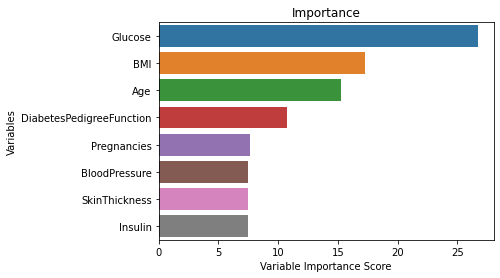

In [123]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [152]:
modeller = [knn_tuned,
           loj_model,
           svm_tuned,
           mlp_tuned,
           cart_tuned,
           rf_tuned,
           gbm_tuned,
           catb_tuned,
           lgb_tuned,
            xgb_tuned]
sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller","Accuracy"])
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]],columns = ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

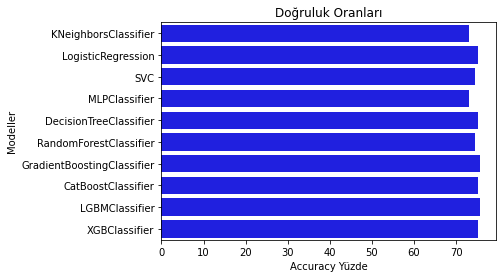

In [153]:
sns.barplot(x="Accuracy",y="Modeller",data=sonuclar,color="b")
plt.xlabel("Accuracy Yüzde")
plt.title("Doğruluk Oranları");

In [154]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.324675
0,SVC,74.458874
0,MLPClassifier,73.160173
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.458874
0,GradientBoostingClassifier,75.757576
0,CatBoostClassifier,75.324675
0,LGBMClassifier,75.757576
0,XGBClassifier,75.324675
